# Basis - from linear algebra to quantum chemistry

<b>Developed by</b> Elias Anderssen Dalan <a href="mailto:ceadyy@gmail.com">✉️</a>, supported by Centre for Computing in Science Education and Hylleraas Centre for Quantum Molecular Sciences.

### Note:

If you are not familliar with Dirac notation I suggest that you read <a href="https://openworldlearning.github.io/docs/quantum_mechanics/linear_combinations.html">this notebook</a>, as it allows a much denser form of mathmatical notation.  

## The classical encounter in linear algebra
From your mathmatical studies you might have encountered the term *basis*. Do not worry if this does not ring a bell, we will go through as short summary together! 

Let us first go through the classic definition of a basis you encounter in your linear algebra course:

A set of vectors, $B = \{\mathbf{v_1}, \mathbf{v_2},...,\mathbf{v_m}\}$, in some vector space $V$ is called a basis for $V$ if every element in $V$ can be written as a linear combination of the vectors in $B$. In other words: If every vector, $\mathbf{w}$, in $V$ can be expressed as some vector $\mathbf{w} = c_1 \mathbf{v_1} + c_2 \mathbf{v_2} + ... + c_m \mathbf{v_m}$ then $B$ is a basis for $V$. 

This might still be difficult to wrap your head around, so lets look at a concrete example:
The vectors $\hat{\imath} = (1, 0, 0)$, $\hat{\jmath} = (0, 1, 0)$ and $\hat{k} = (0, 0, 1)$ are a basis for $\mathbb{R}^3$ since every vector in $\mathbb{R}^3$ can be expressed as a linear combination of $\hat{\imath}$,  $\hat{\jmath}$ and $\hat{k}$!

### Questions/tasks you might want to try:

<ul>
    <li> Is $B = \{\hat{\imath}$, $\hat{\jmath}$, $\hat{k}$} the only basis for $\mathbb{R}^3$? Can you find examples 
         of other basises? Hint: maybe a set of three different orthogonal vectors will work?
</ul>

## Expanding into functions

The concept of a *basis* can be expanded to functions! Just like you can represent a vector as a linear combination of basisvectors, you can represent a function $\vert f(x) \rangle$ as a linear combination of basisfunctions from some set $\mathcal{G} = \{\vert g_1 (x) \rangle, \vert g_2 (x) \rangle, ..., \vert g_m (x) \rangle \}$, where

$$
\vert f(x) \rangle = \sum_m f_m \vert g_m \rangle,
$$
and $f_m$ are coefficients. You are probably more familliar with this than you think, namely the Fourier series! Any function can be expressed as a linear combination of a basis of different sine and cosine functions. 

### Questions/tasks you might want to try:

<ul>
    <li> Try to suggest a basis for $f(x) = 4x^3 + 3x + 1$
</ul>

## The term basis in quantum chemistry

In quantum chemistry we often use the term *basis* when talking about some set of functions used to describe some chemichal system. These sets are often just referred to as *basis sets*. There is not much theory here, so lets jump right into an example! 

Let us say you want to describe a $1s$-hydrogen orbital. We will be concerned about one dimensional hydrogen, as it is the easiest to visualize, but the theory is easily transferrable to higher dimensions. The electronic Schrødinger-equation for atomic hydrogen is one of the few quantum systems we are able to solve analytically, and the wave equation for the $1s$-orbital in one dimension is,
$$
\vert \psi_{1s} \rangle = \big (\frac{1}{1} \big ) e^{-\vert x \vert}.
$$

The absolute value in the exponent makes calculations quite difficult, as derivatives of the absolute value are not well defined at the center. To try to mimic the cusp-like behaviour of $\vert \psi \rangle$ we often use basis of Gaussian exponentials and create a linear combination of them to approximate the true $\vert \psi \rangle$. There are three different basis sets provided, using the STO-nG format, where n denotes the number of basis functions in our basis set. The following sets are provided:
$$
\text{STO-3G} = \{ \},
$$
and
$$
\text{STO-5G} = \{ \}.
$$

Let us plot them and see how they mimic $\vert \psi \rangle$!

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
def loss(exps, cs):
    x = np.linspace(-10, 10, 1000)
    loss = 0
    y_gto = 0
    for e, c in zip(exps, cs):
        y_gto += c * np.exp(-e * x**2)
        
    loss = np.mean(np.abs(y_gto - np.exp(-np.abs(x))))
    
    return loss

exponents = np.linspace(0, 1, 15)
preexp_factors = np.linspace(0, 1, 15)

zetas = []
cs = []
min_loss = np.inf

for e1 in exponents:
    for e2 in exponents:
        for e3 in exponents:
            for c1 in preexp_factors:
                for c2 in preexp_factors:
                    for c3 in preexp_factors:
                        current_loss = loss([e1, e2, e3], [c1, c2, c3])
                        
                        if current_loss < min_loss:
                            zetas = [e1, e2, e3]
                            cs = [c1, c2, c3]
                            min_loss = current_loss
print(zetas, cs)

[0.14285714285714285, 0.2857142857142857, 1.0] [0.14285714285714285, 0.14285714285714285, 0.42857142857142855]


In [15]:
x = np.linspace(-30, 30, 1000)

phi_gto = lambda x: cs[0]*np.exp(-zetas[0]*x**2) + cs[1]*np.exp(-zetas[1]*x**2) + cs[2]*np.exp(-zetas[2]*x**2)

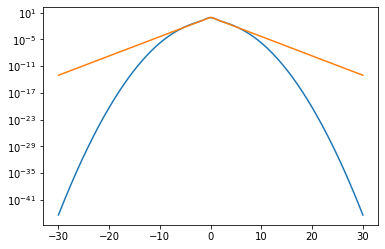

In [16]:
plt.plot(x, phi_gto(x))
plt.plot(x, np.exp(-np.abs(x)))
plt.yscale("log")